In [29]:
import sqlite3
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
import nltk
import sklearn
from sklearn.decomposition import PCA

# The data I have yet to "feature-ize"

## Amino Acid-level features
1. Amino Acid Modifications
2. Secondary Structure
3. Amino Acid Disorder

## Protein-level features
1. Subcellular localization
2. Tissue expression
3. Protein overall disorder

Lets start with the protein level features for simplicity's sake.

In [2]:
conn = sqlite3.connect("human_protein.db")
subloc_df = pd.read_sql('select * from protein_subcellular_localization', con=conn)
conn.close()
#conn = sqlite3.connect("protein_training.db")
#conn.close()
subloc_df.sample(5)

,protein,subcellular_loc
27208,NF2IP_HUMAN,Cytoplasm
13614,HS90B_HUMAN,Secreted
32097,ACL7B_HUMAN,Cytoplasm
9050,CBPE_HUMAN,Secretory vesicle membrane
25044,RNC_HUMAN,Nucleus


In [3]:
# Parse keywords to columns
def keywordBinarizer(df, index, keyword):
    key_low = keyword.lower().replace(" ","_").strip()
    if key_low not in df.columns:
        df.loc[:,key_low] = 0
    df.loc[index, key_low] = 1

subloc_df.apply(lambda row: keywordBinarizer(subloc_df, row.name, row.subcellular_loc), axis=1)
#subloc_df.loc[:,'loc_frozen'] = subloc_df['subcellular_loc'].apply(list).apply(frozenset)
#for keyword in tqdm_notebook(frozenset.union(*subloc_df.loc_frozen)):
#    subloc_df[keyword.strip()] = subloc_df.apply(lambda x: int(keyword in x.loc_frozen),axis=1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
34680    None
34681    None
34682    None
34683    None
34684    None
34685    None
34686    None
34687    None
34688    None
34689    None
34690    None
34691    None
34692    None
34693    None
34694    None
34695    None
34696    None
34697    None
34698    None
34699    None
34700    None
34701    None
34702    None
34703    None
34704    None
34705    None
34706    None
34707    None
34708    None
34709    None
Length: 34710, dtype: object

In [4]:
subloc_binar = subloc_df.drop('subcellular_loc',axis=1)
subloc_binar.head()

,protein,cytoplasm,cytosol,rough_endoplasmic_reticulum,cytoplasmic_vesicle_membrane,golgi_apparatus_membrane,golgi_apparatus,trans-golgi_network_membrane,endosome_membrane,recycling_endosome_membrane,...,nucleoid,fimbrium,cell_wall,host_golgi_apparatus_membrane,host_nucleus,host_cytoplasm,forespore_intermembrane_space,spore_wall,host_mitochondrion_inner_membrane,host_cytosol
0,RL6_HUMAN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RL6_HUMAN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RL6_HUMAN,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,RAB10_HUMAN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RAB10_HUMAN,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


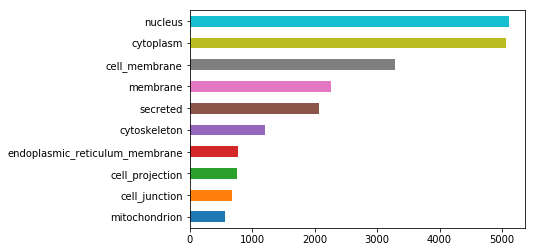

In [5]:
loc_sum = subloc_binar.set_index('protein').sum(axis=0).sort_values()
loc_sum.iloc[-10:].plot.barh()

In [6]:
conn = sqlite3.connect("protein_training.db")
subloc_binar.to_sql('protein_subloc', index=False, con=conn, if_exists='replace')
conn.close()

In [7]:
conn = sqlite3.connect("human_protein.db")
tissue_df = pd.read_sql('select * from protein_tissue_expression', con=conn)
conn.close()
tissue_df.sample(5)

,protein,disease
8899,PRD14_HUMAN,Expressed in embryonic stem cells. Tends to be...
4973,TMA7_HUMAN,Expressed in dermal papilla cells with aggrega...
7660,NFAC4_HUMAN,"Highly expressed in placenta, lung, kidney, te..."
5114,ELAV2_HUMAN,Brain; neural-specific.
7264,ZN365_HUMAN,Isoform 1 is expressed in brain. Isoform 2 is ...


In [17]:
docs = tissue_df.disease.tolist()
tf_idf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer('content')
docs_tfidf_transformed = tf_idf_vectorizer.fit_transform(docs)
docs_tfidf_df = pd.DataFrame(docs_tfidf_transformed.toarray(), columns=tf_idf_vectorizer.get_feature_names(), index=tissue_df.protein)
print(docs_tfidf_df.shape)
docs_tfidf_df.head()

(9713, 5326)


,01,02,07e,10,100,1000,10087195,10087202,10092508,101,...,yt,zdhhc17,zeb1,zeta,zmpste24,zona,zone,zones,zr,zymogen
protein,,,,,,,,,,,,,,,,,,,,,
PYRG1_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RAB43_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RAB2B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RAB36_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RAB17_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0,0.5,'cumulative explained variance')

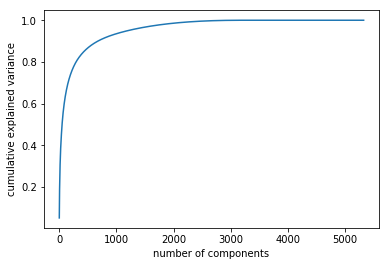

In [44]:
pca = PCA(docs_tfidf_df.shape[1])
pca.fit(docs_tfidf_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [47]:
ninety_cutoff = np.argmax(np.cumsum(pca.explained_variance_ratio_)>0.9)

In [52]:
pca_final = PCA(ninety_cutoff)
pca_final.fit(docs_tfidf_df)
pca_final.fit_transform(docs_tfidf_df)
cut_tfidf_df = pd.DataFrame(pca_final.transform(docs_tfidf_df), 
                            columns=docs_tfidf_df.columns,
                           index=docs_tfidf_df.index)
cut_tfidf_df.head()

ValueError: Shape of passed values is (676, 9713), indices imply (5326, 9713)

In [53]:
" ".join([
    "%+0.3f*%s" % (coef, feat) 
    for coef, feat in zip(pca_final.components_[0], docs_tfidf_df.columns)
])

'+0.000*01 +0.000*02 -0.000*07e +0.001*10 +0.000*100 +0.000*1000 +0.000*10087195 +0.000*10087202 -0.000*10092508 +0.000*101 -0.000*10192387 -0.000*10202149 +0.000*10212285 +0.000*10222237 +0.000*10328880 -0.000*10330192 +0.000*10331944 -0.000*10393320 +0.000*10403379 -0.000*10428823 +0.000*10436421 +0.000*10438909 -0.000*10446192 -0.000*10446193 +0.000*10449773 -0.000*10464311 +0.000*10480894 -0.000*10484328 -0.000*10486209 +0.000*10493834 +0.000*10504407 +0.000*10512762 +0.000*10534407 +0.000*10542267 -0.000*10551270 +0.000*10564580 +0.000*10574462 +0.000*10574464 +0.000*10601354 -0.000*10602361 -0.000*10608886 +0.000*10617103 +0.000*10625079 -0.000*10626797 -0.000*10653850 +0.000*10660572 +0.000*10681448 +0.000*10690896 +0.000*10692253 -0.000*10692392 -0.000*10698717 -0.000*10721722 +0.000*10727470 +0.000*10727622 -0.000*10729221 +0.000*10753836 +0.000*10756092 +0.000*10764746 +0.000*10770959 +0.000*10772777 -0.000*10777209 +0.000*10781606 -0.000*10783259 +0.000*10802664 +0.000*10873